In [1]:
import pandas as pd

tweets = pd.read_csv('tweets.csv', encoding = "utf-8")

tweets.head()

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
2,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
3,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology


In [2]:
print('Data size:', tweets.shape)

Data size: (26747, 2)


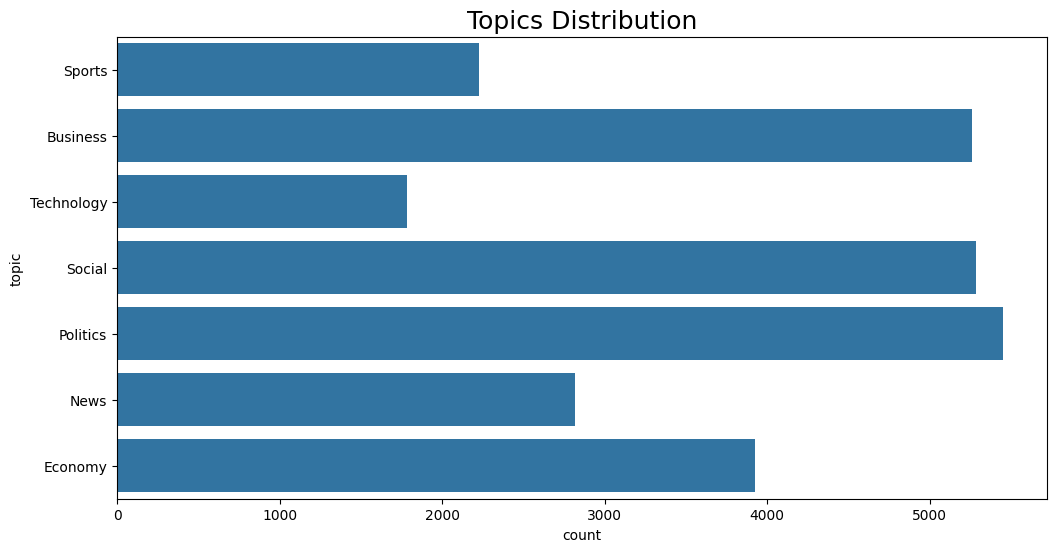

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic')
plt.title('Topics Distribution', fontsize=18)

plt.show()

In [4]:
import string
import re
import nltk

nltk.download('punkt')

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from snowballstemmer import stemmer

def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def clean_tweet(tweet):
      
    emoj = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF" 
            u"\U00002500-\U00002BEF"  
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)
    
    tweet =  re.sub(emoj, '', tweet)

    
    tweet = re.sub("@[^\s]+","",tweet)
    
    tweet = re.sub("RT","",tweet)
    
    tweet = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweet)
    
    tweet = re.sub(r'[0-9]+', '', tweet)  
    
    tweet = remove_chars(tweet, "٠١٢٣٤٥٦٧٨٩")
 
    
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    
    english_punctuations = string.punctuation
    
    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)
     
    tweet = remove_repeating_char(tweet)
    
    tweet = tweet.replace('\n', ' ')  
      
    tweet = tweet.strip(' ')  
    return tweet

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [5]:
pip install snowballstemmer


Note: you may need to restart the kernel to use updated packages.


In [6]:
def tokenizingText(text):
    tokens_list = word_tokenize(text)
    return tokens_list

def filteringText(tokens_list):
    
    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered

def stemmingText(tokens_list): 
    
    ar_stemmer = stemmer("arabic")
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list
    
def toSentence(words_list):  
    sentence = ' '.join(word for word in words_list)
    return sentence

In [7]:
def process_tweet(tweet):
    
    tweet=clean_tweet(tweet)
    
    tokens_list=tokenizingText(tweet)
    
    tokens_list=filteringText(tokens_list)
    
    tokens_list=stemmingText(tokens_list)
    return tokens_list

In [8]:
text= "أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  "

processed_tweet= process_tweet(text)
print(processed_tweet)

['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [9]:
tweets['tweet'] = tweets['tweet'].apply(process_tweet)

tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports
2,"[عذيب, سعر, حال]",Business
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology
...,...,...
26742,"[خير, سحب, مبلغ, الاف, ولم, تخرج, صراف, طريق, ...",Business
26743,"[صرف, ادو, ياخذ, اسبوع, لاسبوع, والادو, باق, ا...",Business
26744,"[جيت, قدم, لاغ, يوم, رقع, اسعار, تطبيق, مشكل, ...",Business
26745,"[حال, توف, مريض, مستشفي, حق, مطالب, ماليه, نرج...",Business


In [10]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

tweets, Y = oversample.fit_resample(tweets, tweets.topic)

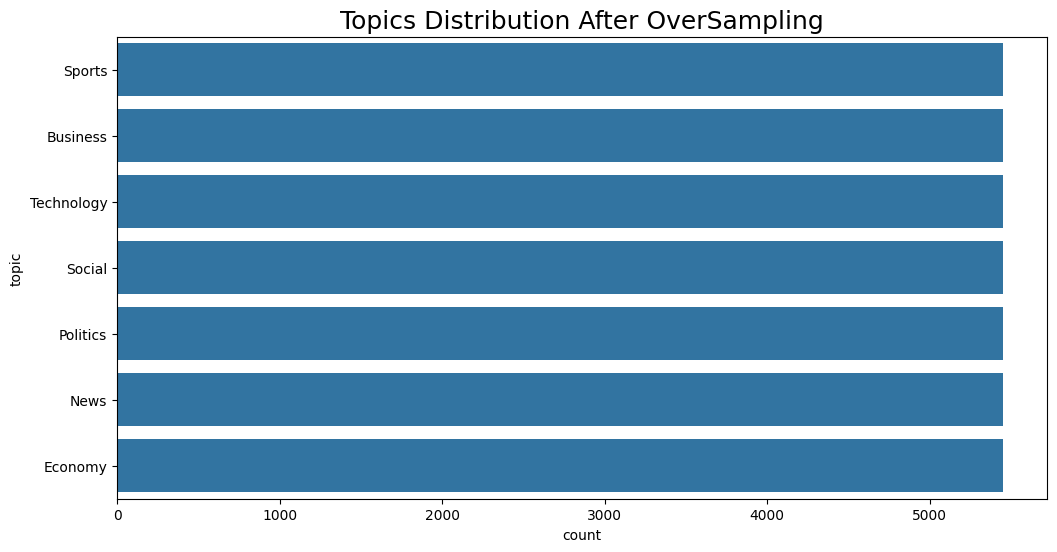

In [11]:
plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic')
plt.title('Topics Distribution After OverSampling', fontsize=18)

plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le_topics = LabelEncoder()
tweets['topic'] = tweets[['topic']].apply(le_topics.fit_transform)

classes = le_topics.classes_

n_classes = len(classes)
print("No. of classes:", n_classes)
print("Classes:", classes)
print("Coding: ", le_topics.transform(classes))

No. of classes: 7
Classes: ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
Coding:  [0 1 2 3 4 5 6]


In [13]:
sentences = tweets['tweet'].apply(toSentence)

sentences

0        حارس عند ضعف نظر مدر يحرص عموم حال حال لاعب هل...
1        كثير متع كان حاضر ملعب قيم الفن عاليه سالمالدو...
2                                             عذيب سعر حال
3        حمدلله شعور يوصف ولن انسي فضل جمهور هلال عل شخ...
4        ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
                               ...                        
38145    مقارن ايباد Air جديد والاصدار سابق اجهز ايباد ...
38146                          ازرار اضاف مسابق مستقبلTECH
38147                                                  زيت
38148    صحيح استخدم متصفح سفار وابحث Google محمد النب ...
38149    تعديل مهم قادم تويتر صفح تصفح تغريد يكون خيار ...
Name: tweet, Length: 38150, dtype: object

In [14]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sentences)
num_words = len(tokenizer.word_counts)
print("Number of words:", num_words)

Number of words: 21984


In [15]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words )

tokenizer.fit_on_texts(sentences)

X = tokenizer.texts_to_sequences(sentences)

In [16]:
print(X[0])
print(X[1])

[2819, 48, 1646, 217, 1400, 4519, 2318, 161, 161, 670, 2, 3864, 3616, 161]
[283, 1864, 251, 3617, 3256, 170, 307, 9282, 9283, 511, 2066, 6323, 151]


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = pad_sequences(X, maxlen=max_len)
print(X[0])
print(X[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 2819   48 1646  217 1400 4519
 2318  161  161  670    2 3864 3616  161]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0  283 1864  251 3617 3256
  170  307 9282 9283  511 2066 6323  151]


In [18]:
tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",5
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",5
2,"[عذيب, سعر, حال]",0
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",5
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",6
...,...,...
38145,"[مقارن, ايباد, Air, جديد, والاصدار, سابق, اجهز...",6
38146,"[ازرار, اضاف, مسابق, مستقبلTECH]",6
38147,[زيت],6
38148,"[صحيح, استخدم, متصفح, سفار, وابحث, Google, محم...",6


In [19]:
y = tweets['topic']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
from keras.models import Sequential

from keras.layers import Embedding, Dense, LSTM

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2

model = Sequential()

model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_len))

model.add(LSTM(units = hidden_unit, dropout=dropout_rate))

model.add(Dense(units = len(classes), activation = 'softmax'))

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [23]:
history = model.fit(X_train, y_train,
                             epochs=10, batch_size=32,
                             validation_data=(X_test, y_test))

Epoch 1/10
895/895 [==============================] - 29s 28ms/step - loss: 0.8496 - accuracy: 0.7428 - val_loss: 0.4176 - val_accuracy: 0.8780
Epoch 2/10
895/895 [==============================] - 24s 26ms/step - loss: 0.2959 - accuracy: 0.9140 - val_loss: 0.3054 - val_accuracy: 0.9126
Epoch 3/10
895/895 [==============================] - 25s 28ms/step - loss: 0.1684 - accuracy: 0.9514 - val_loss: 0.2989 - val_accuracy: 0.9163
Epoch 4/10
895/895 [==============================] - 32s 36ms/step - loss: 0.1083 - accuracy: 0.9686 - val_loss: 0.3152 - val_accuracy: 0.9154
Epoch 5/10
895/895 [==============================] - 35s 40ms/step - loss: 0.0809 - accuracy: 0.9763 - val_loss: 0.3233 - val_accuracy: 0.9166
Epoch 6/10
895/895 [==============================] - 37s 41ms/step - loss: 0.0620 - accuracy: 0.9826 - val_loss: 0.3543 - val_accuracy: 0.9149
Epoch 7/10
895/895 [==============================] - 36s 40ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.3518 - val_accuracy:

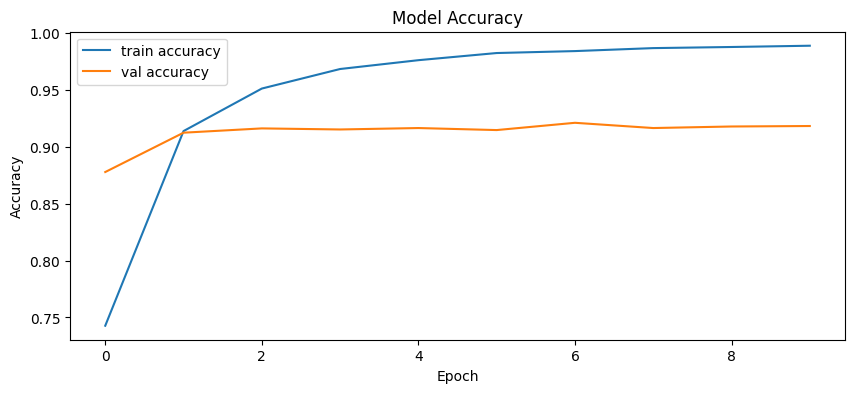

In [24]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')

ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

In [25]:
model.save('perosn_classification_model.keras')

import pickle
tokenizer_path = 'perosn_classification_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [26]:
import numpy as np

def classify_tweet(tweet, model, tokenizer, max_len=50):
    
    seq = tokenizer.texts_to_sequences([tweet])
    
    pseq = pad_sequences(seq, maxlen=max_len)
    
    predections = model.predict(pseq)
    
    pred=np.argmax(predections)
    return pred

In [27]:
from keras.models import load_model
import pickle
classes= ['Business', 'Economy', 'News', 'Politics', 'Social', 'Sports', 'Technology']

def classify_person(person_name,model_path, tokenizer_path, person_path):
    
    model = load_model(model_path)
    
    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)
    
    df = pd.read_csv(person_path)
    
    classes_count=dict()
    
    for i in range(len(classes)):
        key=classes[i]
        classes_count[key]=0

    for _, row in df.iterrows():
        tweet=row['tweet']
        
        processed_tweet=process_tweet(tweet)
        
        code= classify_tweet(processed_tweet, model, tokenizer)
        
        topic=classes[code]
        
        classes_count[topic]=classes_count[topic]+1
 

    x = classes_count.keys()
    y = classes_count.values()

    import matplotlib.pyplot as plt
    # pie
    plt.figure(figsize=(5,5))
    plt.title(person_name, fontdict = {'fontsize':20})
    plt.pie(y, labels = x,autopct='%1.1f%%')
    plt.show()

1/1 [==============================] - 0s 42ms/step


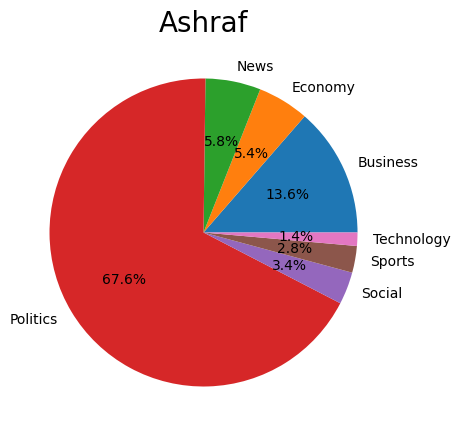

In [28]:
classify_person("Ashraf", 'perosn_classification_model.keras',
                'perosn_classification_tokenizer','ashraf.csv')

1/1 [==============================] - 0s 66ms/step


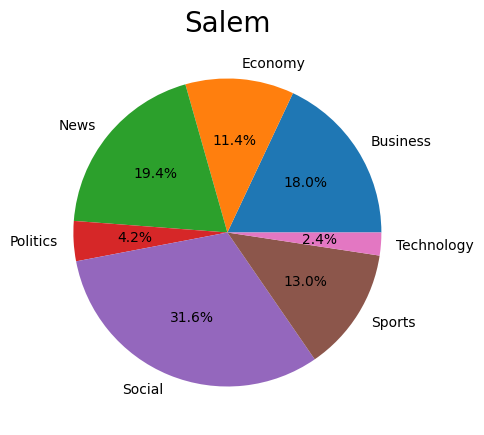

In [29]:
classify_person("Salem",'perosn_classification_model.keras',
                'perosn_classification_tokenizer','salem.csv')